In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
house_prices_df = pd.read_csv("../resources/house_sales.csv")
house_prices_df["date"] = pd.to_datetime(house_prices_df["date"], format="%Y%m%dT%H%M%S")


In [12]:
house_prices_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int64         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [15]:
print("nerp")

nerp


In [14]:
print("nerp")

nerp


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


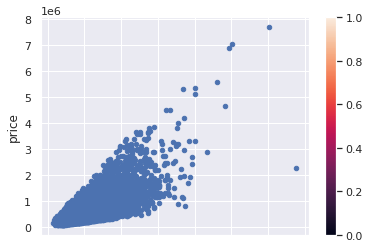

In [33]:
house_prices_df.plot.scatter(x='sqft_living',
                      y='price',
                       colormap='viridis'
                          )

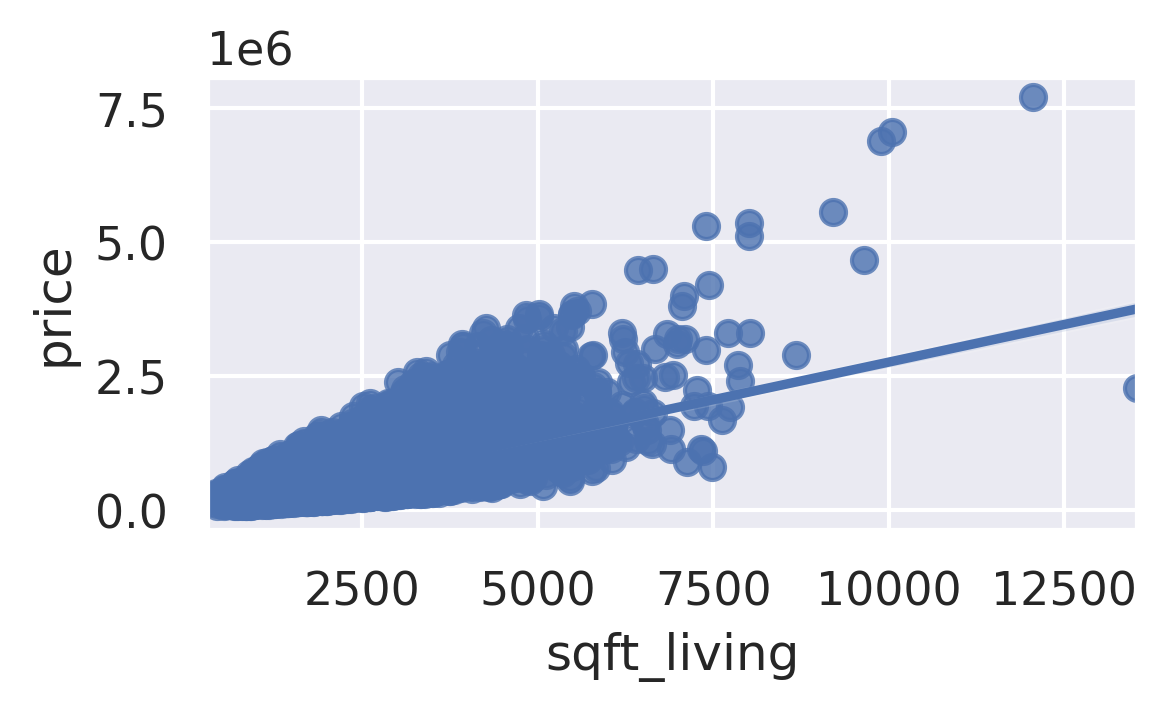

In [28]:
sns.set()
plt.figure(figsize=(4, 2), dpi=300)
sns.regplot(x="sqft_living", y="price", data=house_prices_df)

In [36]:
X = house_prices_df["sqft_living"].values
y = house_prices_df["price"].values

In [37]:
X = X.reshape(-1,1)

In [38]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [39]:
y

array([221900, 538000, 180000, ..., 402101, 400000, 325000])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (17290, 1)
y_train shape (17290,)
X_test shape (4323, 1)
y_test shape (4323,)


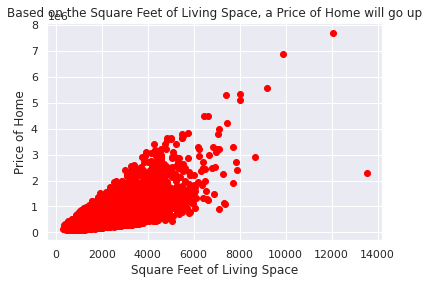

In [42]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel("Square Feet of Living Space")
plt.ylabel("Price of Home")
plt.title("Based on the Square Feet of Living Space, a Price of Home will go up")
plt.show()


In [43]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100,2)} %")
print(f"Test accuracy {round(lm.score(x_test, y_test) * 100,2)} %")
?lm.score

Train accuracy 48.72 %
Test accuracy 51.56 %


Signature: lm.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_samples,)

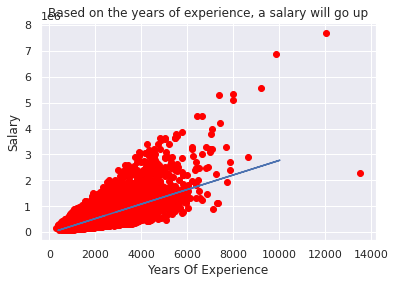

In [44]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Based on the years of experience, a salary will go up")
plt.show()

## What if we normalize per Zipcode?

In [82]:
def check_regression_per_zip(zipcode):
    filtered = house_prices_df[house_prices_df["zipcode"] == zipcode]
    X = filtered["sqft_living"].values
    y = filtered["price"].values
    X = X.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    y_predict = lm.predict(x_test)
    print(f"Train accuracy {round(lm.score(x_train, y_train) * 100,2)} %")
    print(f"Test accuracy {round(lm.score(x_test, y_test) * 100,2)} %")
    ?lm.score
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_test, y_predict)
    plt.xlabel("Square Feet of House")
    plt.ylabel("Purchase Price")
    plt.title(f"Data for zipcode: {zipcode}")
    plt.show()

Train accuracy 71.0 %
Test accuracy 48.86 %


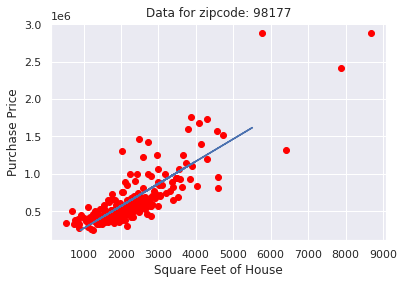

Train accuracy 37.07 %
Test accuracy 26.33 %


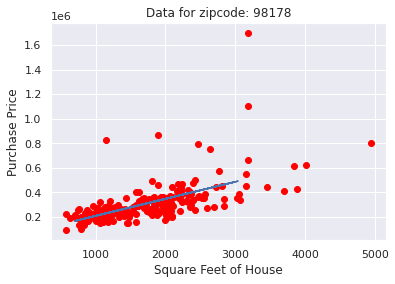

Train accuracy 64.69 %
Test accuracy 51.2 %


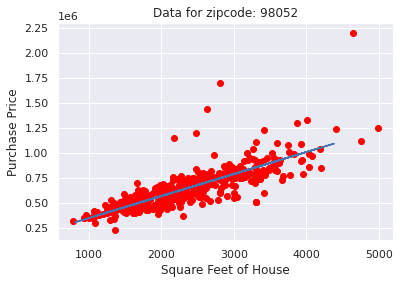

Train accuracy 75.53 %
Test accuracy 81.87 %


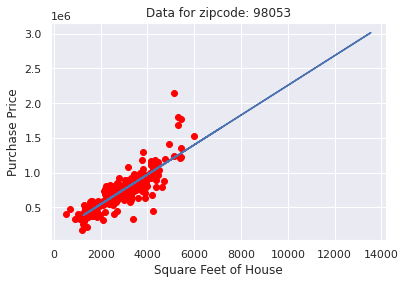

Train accuracy 62.27 %
Test accuracy 42.35 %


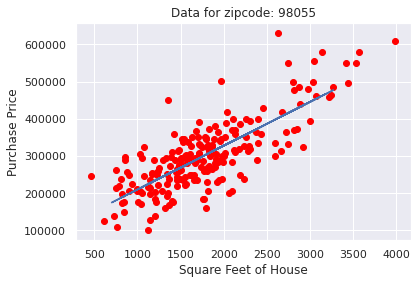

Train accuracy 42.01 %
Test accuracy 49.71 %


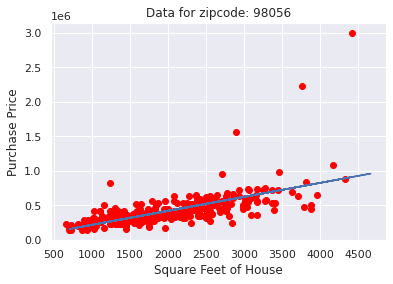

Train accuracy 70.1 %
Test accuracy 47.57 %


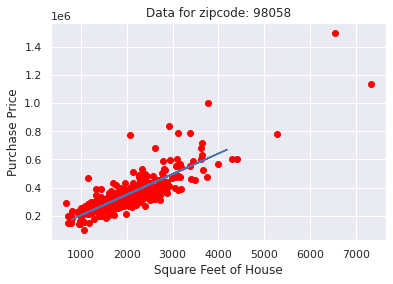

Train accuracy 71.41 %
Test accuracy 74.84 %


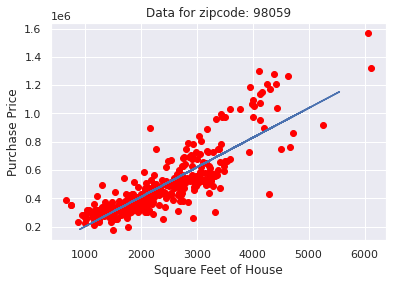

Train accuracy 70.36 %
Test accuracy 65.05 %


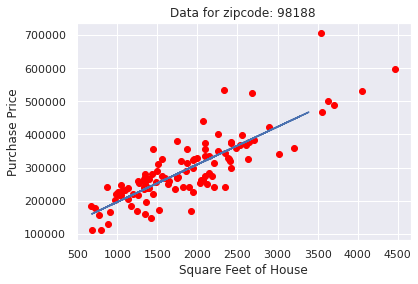

Train accuracy 69.91 %
Test accuracy 86.58 %


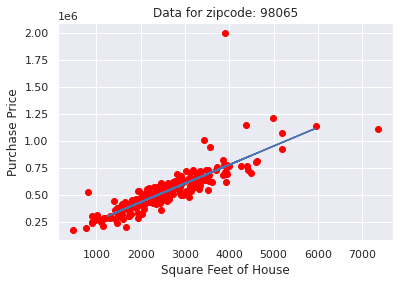

Train accuracy 52.43 %
Test accuracy 52.15 %


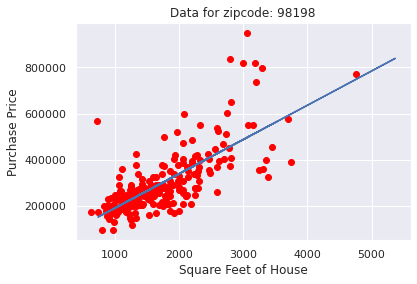

Train accuracy 39.62 %
Test accuracy 45.01 %


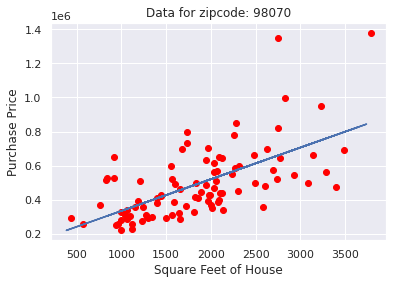

Train accuracy 68.25 %
Test accuracy 59.75 %


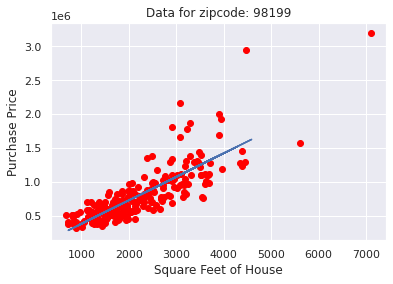

Train accuracy 63.95 %
Test accuracy 66.25 %


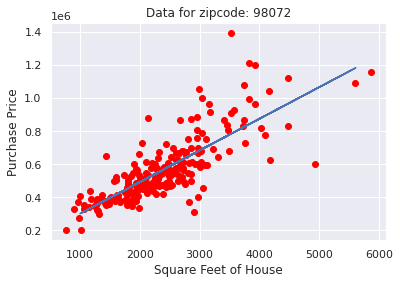

Train accuracy 56.4 %
Test accuracy 43.03 %


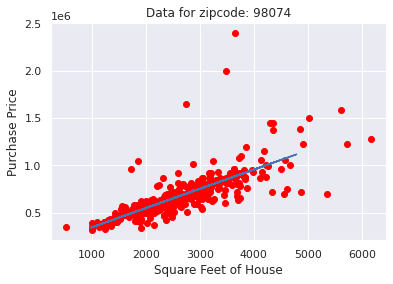

Train accuracy 39.35 %
Test accuracy 51.83 %


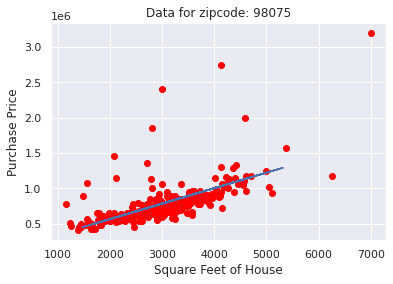

Train accuracy 75.45 %
Test accuracy 81.41 %


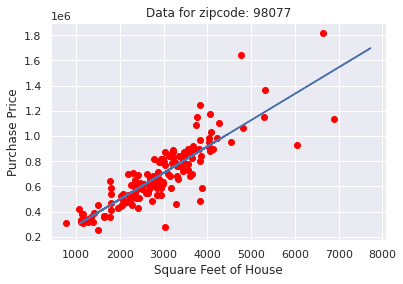

Train accuracy 65.8 %
Test accuracy 68.04 %


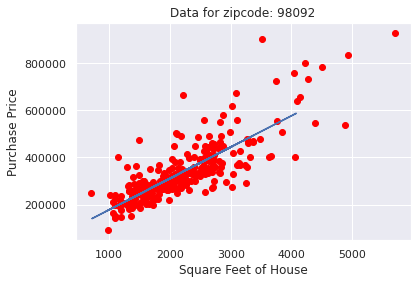

Train accuracy 83.87 %
Test accuracy 26.76 %


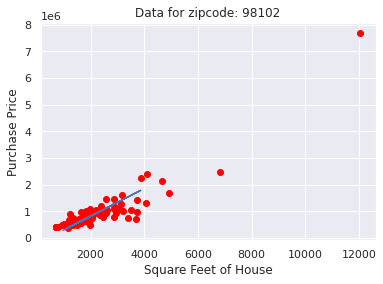

Train accuracy 50.7 %
Test accuracy 62.16 %


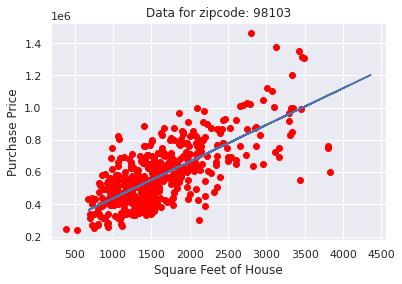

Train accuracy 69.84 %
Test accuracy 84.1 %


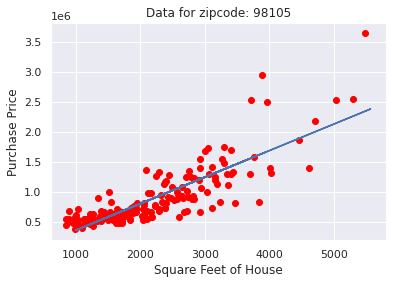

Train accuracy 43.16 %
Test accuracy 54.29 %


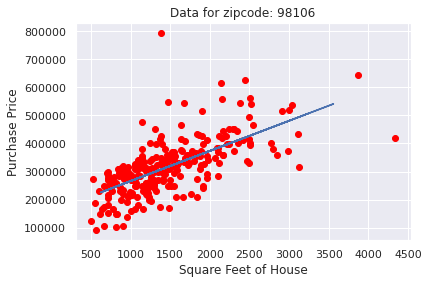

Train accuracy 54.29 %
Test accuracy 38.41 %


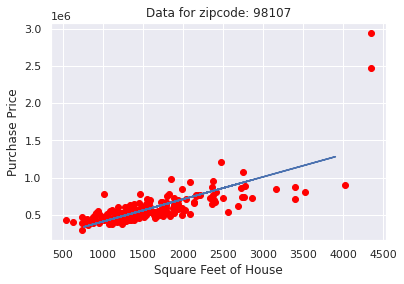

Train accuracy 41.72 %
Test accuracy 53.57 %


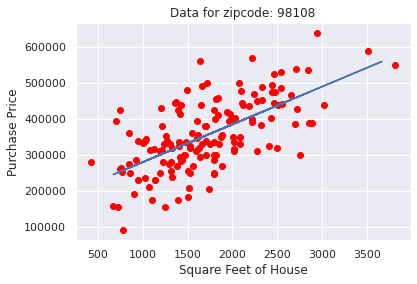

Train accuracy 77.43 %
Test accuracy 60.6 %


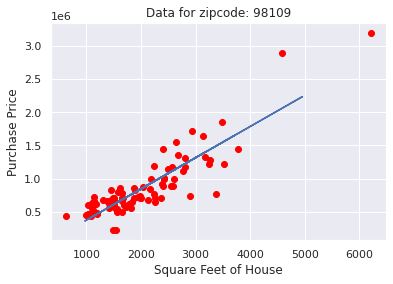

Train accuracy 72.65 %
Test accuracy 74.98 %


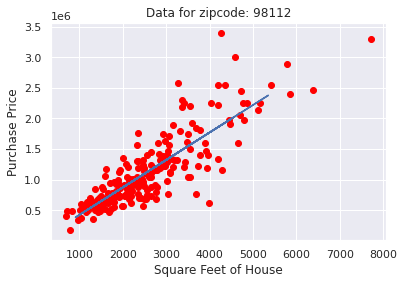

Train accuracy 60.47 %
Test accuracy 65.84 %


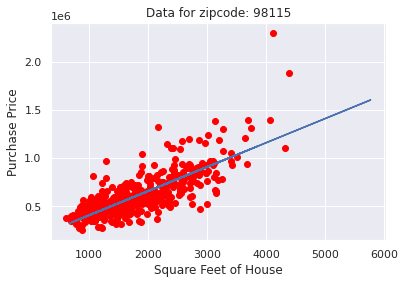

Train accuracy 70.28 %
Test accuracy 59.06 %


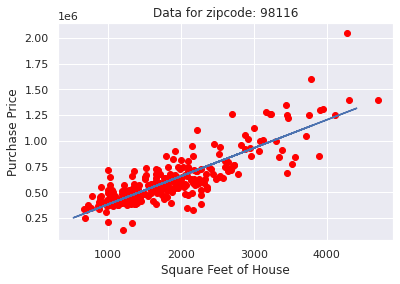

Train accuracy 62.63 %
Test accuracy 50.33 %


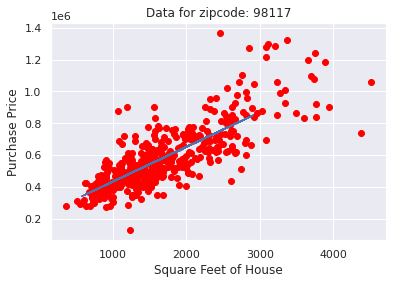

Train accuracy 42.37 %
Test accuracy 43.85 %


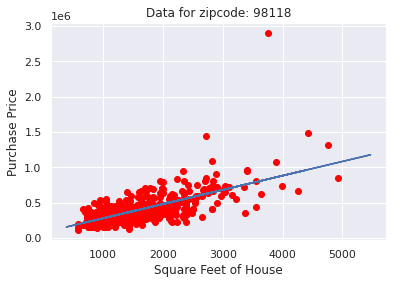

Train accuracy 56.74 %
Test accuracy 66.57 %


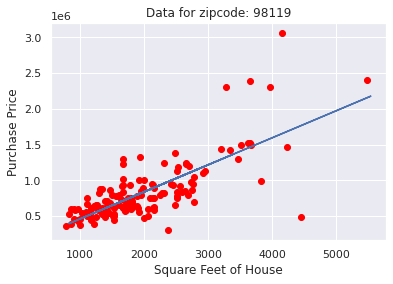

Train accuracy 51.07 %
Test accuracy 63.9 %


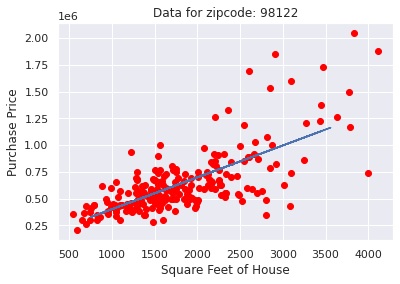

Train accuracy 86.74 %
Test accuracy 93.21 %


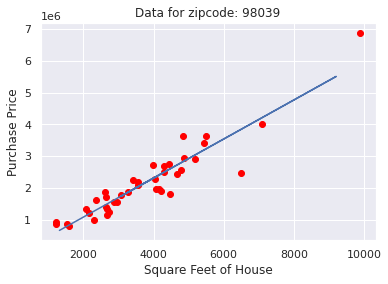

Train accuracy 44.25 %
Test accuracy 26.51 %


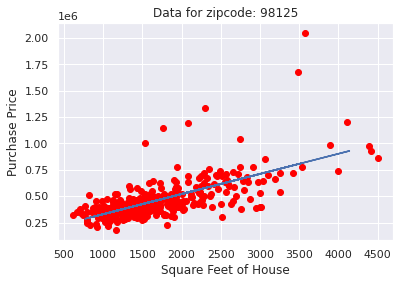

Train accuracy 64.77 %
Test accuracy 68.81 %


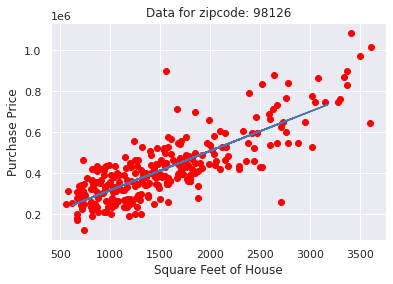

Train accuracy 65.32 %
Test accuracy 70.88 %


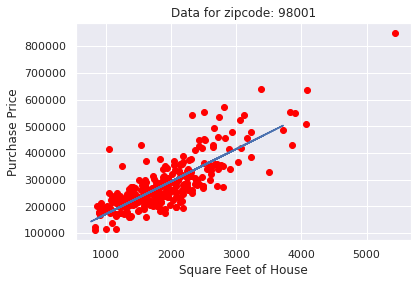

Train accuracy 54.11 %
Test accuracy 76.68 %


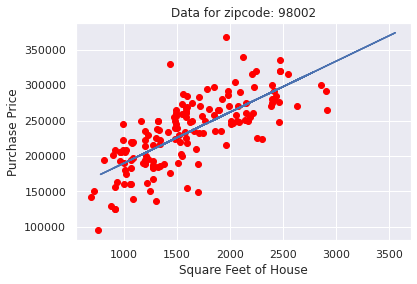

Train accuracy 70.46 %
Test accuracy 63.86 %


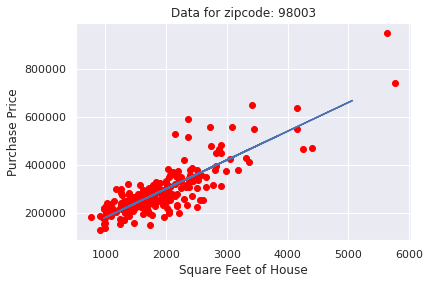

Train accuracy 70.69 %
Test accuracy 76.97 %


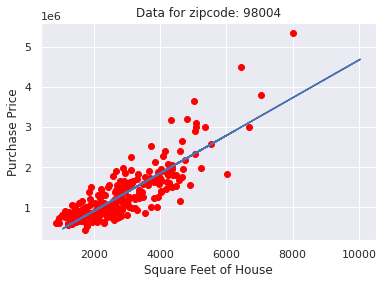

Train accuracy 41.86 %
Test accuracy 44.82 %


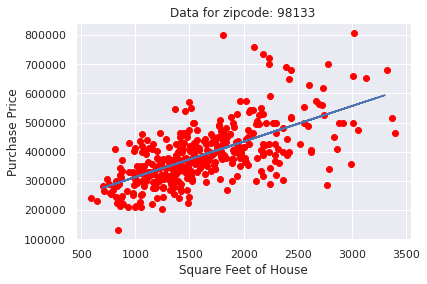

Train accuracy 53.8 %
Test accuracy 57.75 %


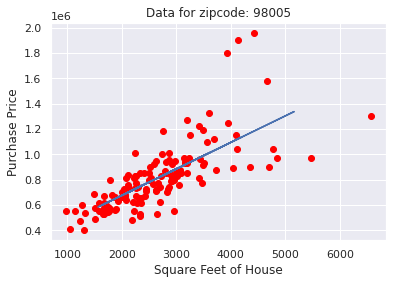

Train accuracy 68.57 %
Test accuracy 74.36 %


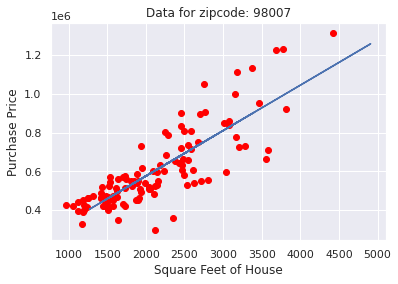

Train accuracy 51.95 %
Test accuracy 72.85 %


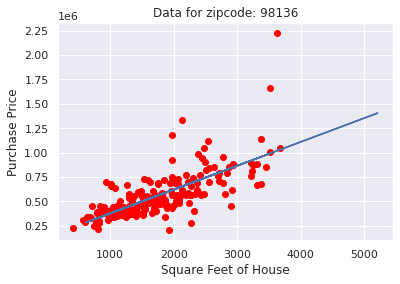

Train accuracy 59.31 %
Test accuracy 42.79 %


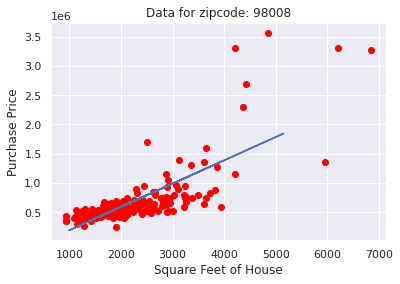

Train accuracy 63.29 %
Test accuracy 70.15 %


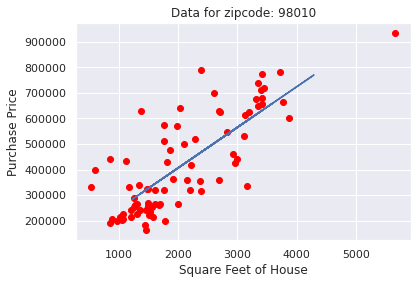

Train accuracy 49.52 %
Test accuracy 50.49 %


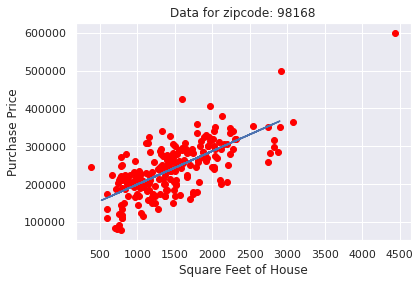

Train accuracy 64.72 %
Test accuracy 60.13 %


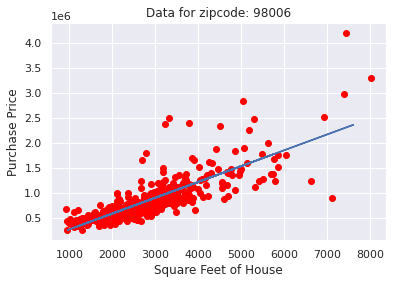

Train accuracy 61.38 %
Test accuracy 83.55 %


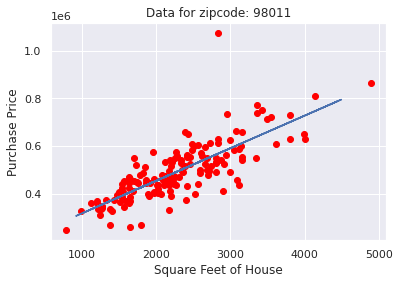

Train accuracy 80.89 %
Test accuracy 36.05 %


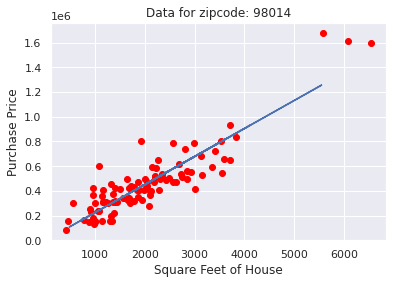

Train accuracy 68.86 %
Test accuracy 54.08 %


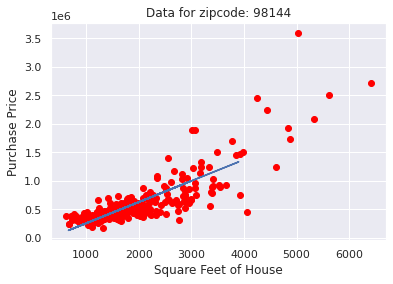

Train accuracy 51.77 %
Test accuracy 31.15 %


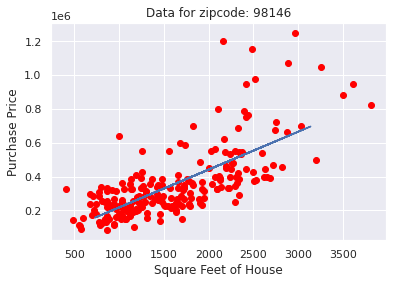

Train accuracy 70.44 %
Test accuracy 59.55 %


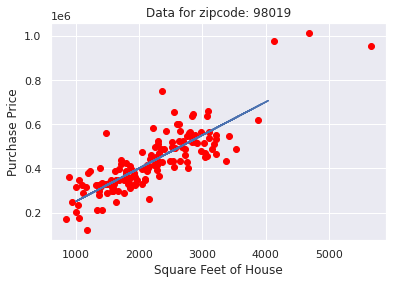

Train accuracy 50.38 %
Test accuracy 71.39 %


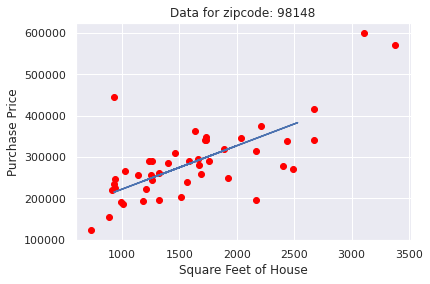

Train accuracy 45.65 %
Test accuracy 23.98 %


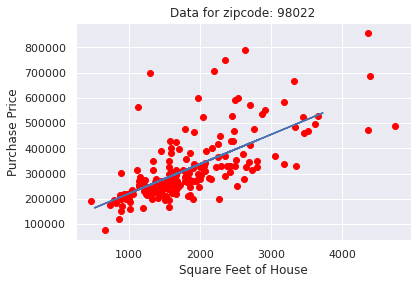

Train accuracy 62.51 %
Test accuracy 60.54 %


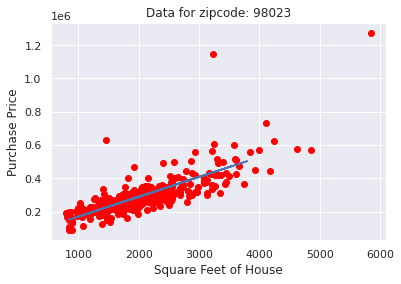

Train accuracy 77.96 %
Test accuracy 82.56 %


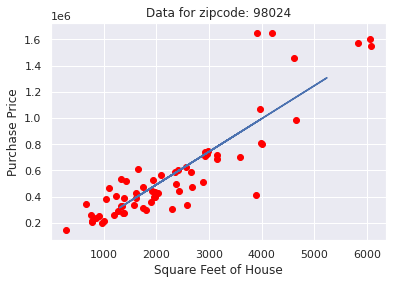

Train accuracy 71.0 %
Test accuracy 47.33 %


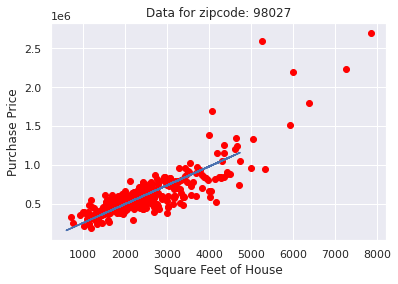

Train accuracy 56.29 %
Test accuracy 44.84 %


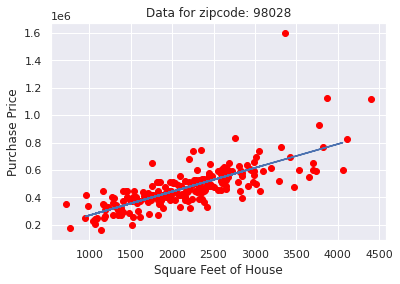

Train accuracy 85.22 %
Test accuracy 68.78 %


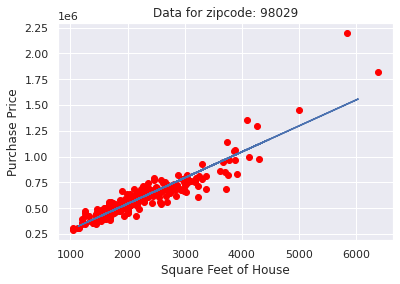

Train accuracy 63.38 %
Test accuracy 65.8 %


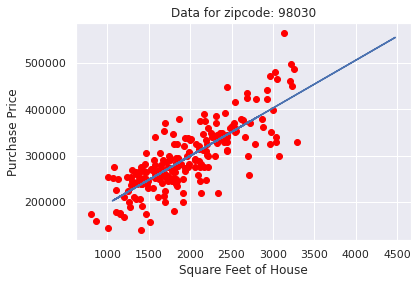

Train accuracy 49.91 %
Test accuracy -5.43 %


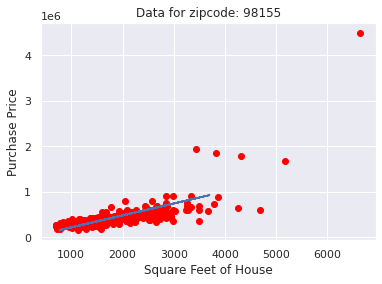

Train accuracy 69.72 %
Test accuracy 49.83 %


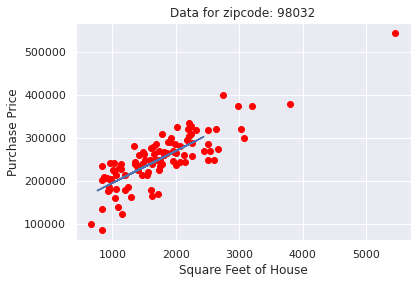

Train accuracy 66.83 %
Test accuracy 67.72 %


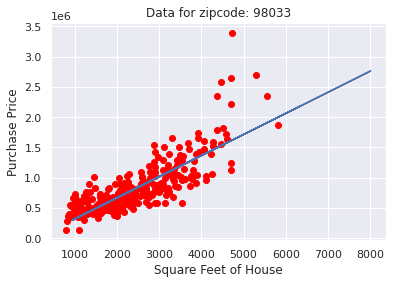

Train accuracy 47.07 %
Test accuracy 53.0 %


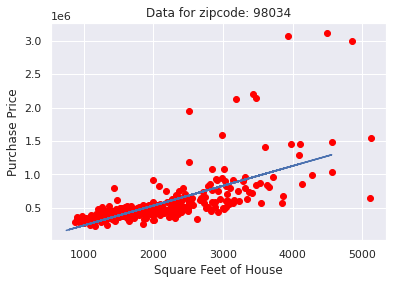

Train accuracy 58.06 %
Test accuracy 45.96 %


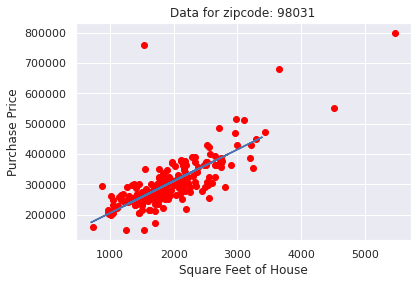

Train accuracy 62.47 %
Test accuracy 72.78 %


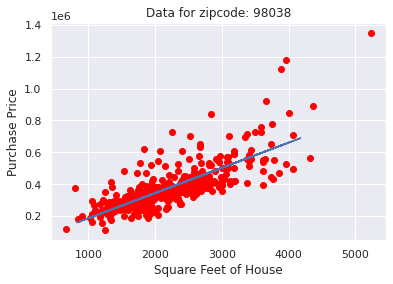

Train accuracy 56.22 %
Test accuracy 14.31 %


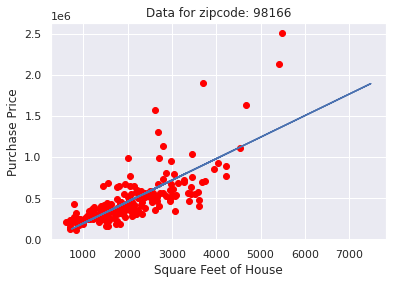

Train accuracy 64.14 %
Test accuracy 56.17 %


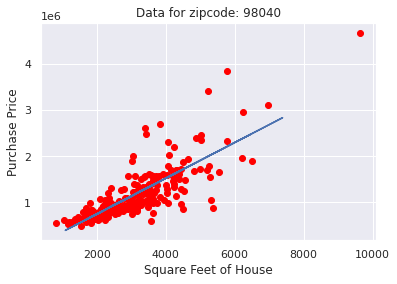

Train accuracy 64.68 %
Test accuracy 52.67 %


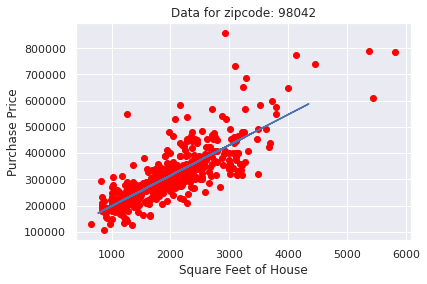

Train accuracy 70.26 %
Test accuracy 78.74 %


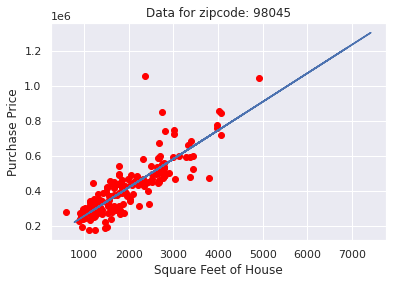

Signature: lm.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_samples,)

In [85]:
set_of_zips = set()
for zip in house_prices_df["zipcode"]:
    set_of_zips.add(zip)

for zip in set_of_zips:
    check_regression_per_zip(zip)

Train accuracy 51.95 %
Test accuracy 72.85 %


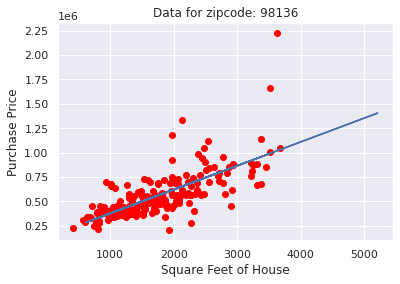

Signature: lm.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_samples,)

In [83]:
# check_regression_per_zip(98136)